In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data_project.csv",sep=";",encoding = "ISO-8859-1")
df.head()

,SAP_Code,Project_Name,Country,RD,Total_Cost_m.ua,bank_contrib_m_ua,Country_type,Sector,PCR_Year,peoples
0,P-CV-DA0-002,CONSTRUCTION D'1 NOUVEL AEROPORT A PRAIA,Cape Verde,RDGW,28.456,6.544000,ADB,Transport,2006,114985
1,P-CV-DB0-002,PROJET ROUTIER,Cape Verde,RDGW,3.890,3.241311,ADB,Transport,2007,87490
2,P-Z1-F00-013,NGA/TGO/BEN.POWER SYST.INTERC.PROJ.,Multinational,RDGW,35.020,11.027217,ADF,Power,2008,968266
3,P-CV-IAH-001,Projet dAppui Institutionnel au Secteur de l...,Cape Verde,RDGW,1.050,0.985109,ADB,Education,2010,3694
4,P-Z1-DB0-010,Aménagement de la Route Kankan - Kouremale - B...,Multinational,RDGW,101.580,24.000000,ADF,Transport,2010,266982


In [10]:
df_0 = df.groupby('Country').SAP_Code.agg({'Nber':'count'})
df_0=df_0.sort_values(by=['Nber',"Country"], ascending=[False,True]).reindex()
df_0=df_0.reset_index()
df_0.head()

,Country,Nber
0,Multinational,48
1,Uganda,26
2,Tanzania,23
3,Ghana,22
4,Malawi,22


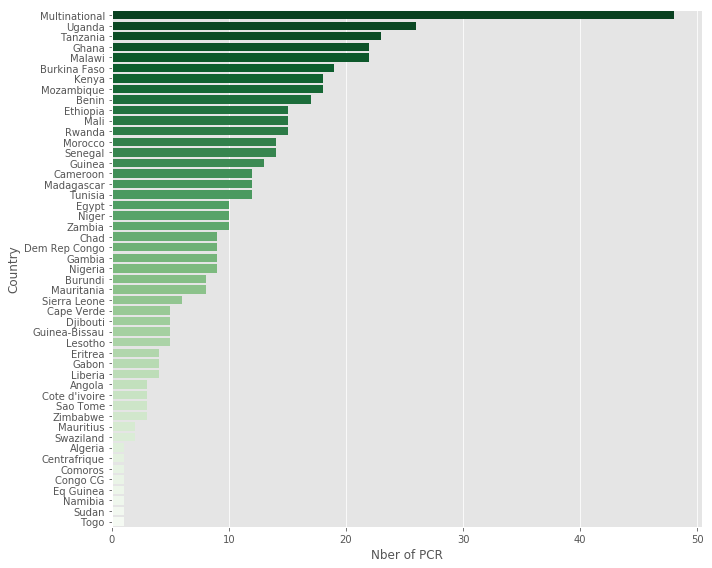

In [14]:
plt.figure(figsize=(10,8))
plt.style.use ("ggplot")
color_pal = sns.color_palette("Greens", len(df_0.index))
color_pal = color_pal[::-1]
sns.barplot(x="Nber", y="Country", data=df_0, palette=color_pal)
plt.xlabel('Nber of PCR')
plt.tight_layout()    
plt.show()

In [15]:
df.shape

(479, 10)

In [16]:
df_1 = df.groupby('RD').SAP_Code.agg({'Nber':'count'})
df_1=df_1.sort_values(by=['Nber',"RD"], ascending=[False,True]).reindex()
df_1=df_1.reset_index()
df_1.head()

,RD,Nber
0,RDGW,172
1,RDGE,127
2,RDGS,75
3,RDGC,57
4,RDGN,48


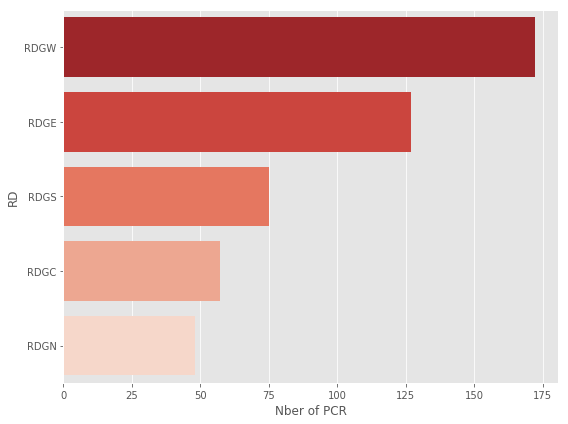

In [18]:
plt.figure(figsize=(8,6))
plt.style.use ("ggplot")
color_pal = sns.color_palette("Reds", len(df_1.index))
color_pal = color_pal[::-1]
sns.barplot(x="Nber", y="RD", data=df_1, palette=color_pal)
plt.xlabel('Nber of PCR')
plt.tight_layout()    
plt.show()

In [19]:
df_2 = df.groupby('Sector').SAP_Code.agg({'Nber':'count'})
df_2=df_2.sort_values(by=['Nber',"Sector"], ascending=[False,True]).reindex()
df_2=df_2.reset_index()
df_2.head()

,Sector,Nber
0,Agriculture,173
1,Transport,77
2,Water Sup/Sanit,69
3,Education,56
4,Health,40


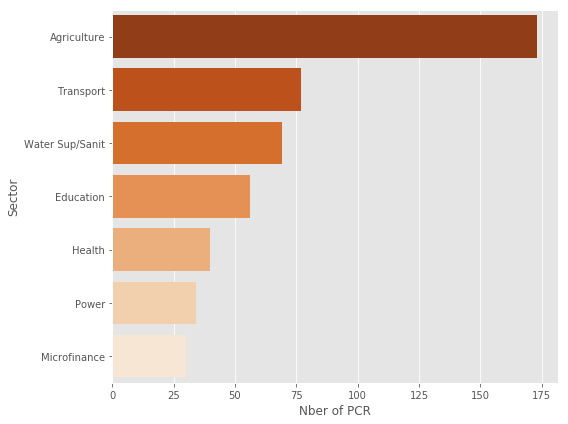

In [22]:
plt.figure(figsize=(8,6))
plt.style.use ("ggplot")
color_pal = sns.color_palette("Oranges", len(df_2.index))
color_pal = color_pal[::-1]
sns.barplot(x="Nber", y="Sector", data=df_2, palette=color_pal)
plt.xlabel('Nber of PCR')
plt.tight_layout()    
plt.show()

In [24]:
df_3 = df.groupby('Country_type').SAP_Code.agg({'Nber':'count'})
df_3=df_3.sort_values(by=['Nber',"Country_type"], ascending=[False,True]).reindex()
df_3

,Nber
Country_type,
ADF,414
ADB,65


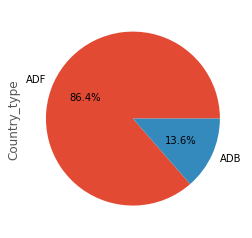

In [28]:
df["Country_type"].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [39]:
df_g=df.groupby(['RD','Sector']).bank_contrib_m_ua.agg({'Bank_fin':'mean'})
df_g=df_g.reset_index()
df_g

,RD,Sector,Bank_fin
0,RDGC,Agriculture,10.910889
1,RDGC,Education,8.889653
2,RDGC,Health,10.713057
3,RDGC,Transport,49.403766
4,RDGC,Water Sup/Sanit,24.754185
5,RDGE,Agriculture,19.434580
6,RDGE,Education,20.020610
7,RDGE,Health,19.642476
8,RDGE,Microfinance,12.117678
9,RDGE,Power,47.104113


In [40]:
df_g=df_g.pivot(index='RD',columns='Sector')
df_g

Bank_fin                                                            \
Sector Agriculture  Education     Health Microfinance       Power  Transport   
RD                                                                             
RDGC     10.910889   8.889653  10.713057          NaN         NaN  49.403766   
RDGE     19.434580  20.020610  19.642476    12.117678   47.104113  33.327354   
RDGN     25.452815  28.337986  32.461648    52.503018  137.583895  87.664419   
RDGS     11.353002  10.060699   6.524602     8.282259   19.334641  17.246631   
RDGW     11.193116  15.203772  16.452460     9.417682   14.515517  26.204560   

                        
Sector Water Sup/Sanit  
RD                      
RDGC         24.754185  
RDGE         26.230417  
RDGN         32.627105  
RDGS         16.856269  
RDGW         20.485844

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

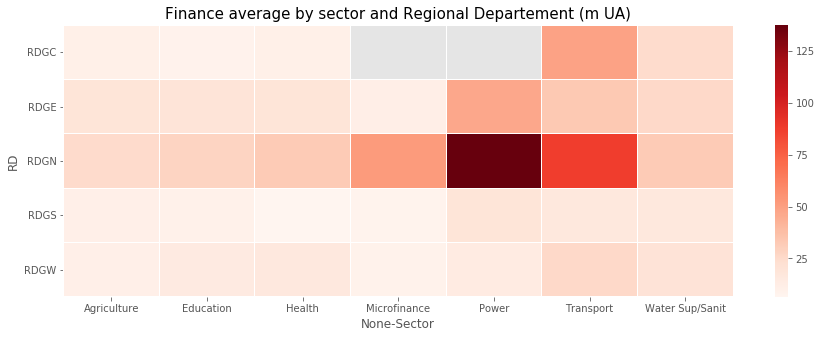

In [50]:
plt.figure(figsize=(15,5))


plt.title('Finance average by sector and Regional Departement (m UA)', size = 15)

xticks=['Agriculture','Education','Health','Microfinance','Power','Transport','Water Sup/Sanit']
yticks=['RDGC','RDGE','RDGN','RDGS','RDGW']                                                                                     
sns.heatmap(df_g, annot=False, fmt=".1f", square = False, cmap = 'Reds',yticklabels=yticks,xticklabels=xticks,
           linewidths=.05)
plt.yticks(rotation=0)

In [51]:
df_t=df.groupby(['Country_type','Sector']).bank_contrib_m_ua.agg({'Bank_fin':'mean'})
df_t=df_t.reset_index()
df_t

,Country_type,Sector,Bank_fin
0,ADB,Agriculture,24.403539
1,ADB,Education,23.436069
2,ADB,Health,27.343212
3,ADB,Microfinance,55.245519
4,ADB,Power,120.981373
5,ADB,Transport,71.441398
6,ADB,Water Sup/Sanit,40.735130
7,ADF,Agriculture,12.934224
8,ADF,Education,15.027494
9,ADF,Health,13.580896


In [53]:
df_t=df_t.pivot(index='Country_type',columns='Sector')
df_t

Bank_fin                                                 \
Sector       Agriculture  Education     Health Microfinance       Power   
Country_type                                                              
ADB            24.403539  23.436069  27.343212    55.245519  120.981373   
ADF            12.934224  15.027494  13.580896    10.028929   30.672880   

                                         
Sector        Transport Water Sup/Sanit  
Country_type                             
ADB           71.441398       40.735130  
ADF           27.852557       20.839855

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

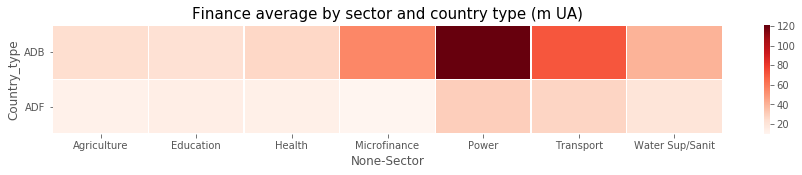

In [55]:
plt.figure(figsize=(15,2))


plt.title('Finance average by sector and country type (m UA)', size = 15)

xticks=['Agriculture','Education','Health','Microfinance','Power','Transport','Water Sup/Sanit']
yticks=['ADB','ADF']                                                                                     
sns.heatmap(df_t, annot=False, fmt=".1f", square = False, cmap = 'Reds',yticklabels=yticks,xticklabels=xticks,
           linewidths=.05)
plt.yticks(rotation=0)

In [56]:
df_g_b=df.groupby(['RD','Sector']).peoples.agg({'beneficiairies':'mean'})
df_g_b=df_g_b.reset_index()
df_g_b

,RD,Sector,beneficiairies
0,RDGC,Agriculture,1.714034e+06
1,RDGC,Education,4.976643e+04
2,RDGC,Health,3.786100e+06
3,RDGC,Transport,6.150791e+05
4,RDGC,Water Sup/Sanit,9.131497e+05
5,RDGE,Agriculture,1.219857e+06
6,RDGE,Education,1.846719e+05
7,RDGE,Health,1.157586e+06
8,RDGE,Microfinance,1.758826e+05
9,RDGE,Power,8.349171e+05


In [57]:
df_g_b=df_g_b.pivot(index='RD',columns='Sector')
df_g_b

beneficiairies                                              \
Sector    Agriculture      Education        Health   Microfinance   
RD                                                                  
RDGC     1.714034e+06   49766.428571  3.786100e+06            NaN   
RDGE     1.219857e+06  184671.937500  1.157586e+06  175882.583333   
RDGN     2.642551e+05   38538.200000  3.442676e+06  113663.000000   
RDGS     6.587020e+04   35593.750000  2.043916e+06   17556.000000   
RDGW     1.959173e+05  127146.300000  3.690806e+06  787772.100000   

                                                    
Sector         Power     Transport Water Sup/Sanit  
RD                                                  
RDGC             NaN  6.150791e+05   913149.666667  
RDGE    8.349171e+05  1.624257e+06   565277.250000  
RDGN    2.317047e+06  3.475612e+06   923589.750000  
RDGS    8.654058e+05  4.912590e+05   491291.812500  
RDGW    3.175013e+05  7.771759e+05   504979.550000

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

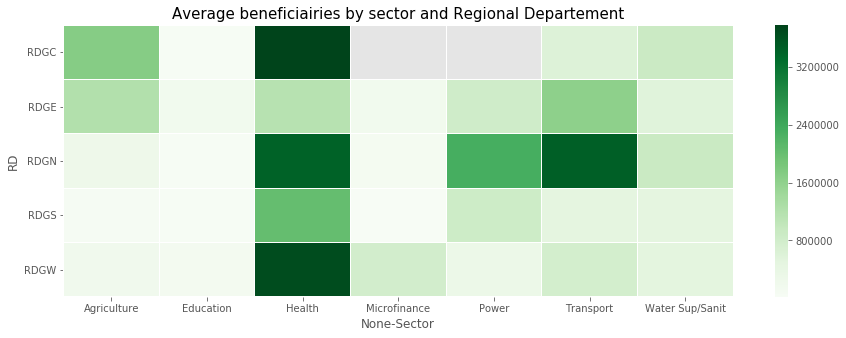

In [58]:
plt.figure(figsize=(15,5))


plt.title('Average beneficiairies by sector and Regional Departement', size = 15)

xticks=['Agriculture','Education','Health','Microfinance','Power','Transport','Water Sup/Sanit']
yticks=['RDGC','RDGE','RDGN','RDGS','RDGW']                                                                                     
sns.heatmap(df_g_b, annot=False, fmt=".1f", square = False, cmap = 'Greens',yticklabels=yticks,xticklabels=xticks,
           linewidths=.05)
plt.yticks(rotation=0)

In [61]:
df_t_b=df.groupby(['Country_type','Sector']).peoples.agg({'beneficiairies':'mean'})
df_t_b=df_t_b.reset_index()
df_t_b=df_t_b.pivot(index='Country_type',columns='Sector')
df_t_b

beneficiairies                                         \
Sector          Agriculture   Education        Health Microfinance   
Country_type                                                         
ADB           172866.904762   23719.375  2.200137e+06    407715.80   
ADF           671270.967105  127786.000  2.946096e+06    342828.64   

                                                          
Sector               Power     Transport Water Sup/Sanit  
Country_type                                              
ADB           2.031110e+06  1.834874e+06   719629.666667  
ADF           6.516768e+05  1.072933e+06   585091.000000

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

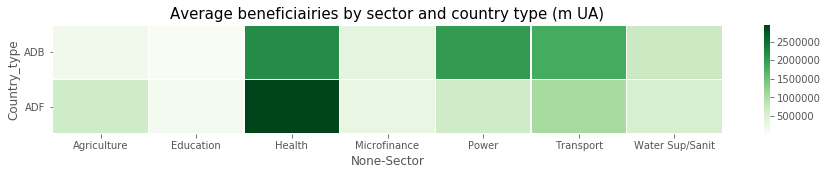

In [64]:
plt.figure(figsize=(15,2))


plt.title('Average beneficiairies by sector and country type (m UA)', size = 15)

xticks=['Agriculture','Education','Health','Microfinance','Power','Transport','Water Sup/Sanit']
yticks=['ADB','ADF']                                                                                     
sns.heatmap(df_t_b, annot=False, fmt=".1f", square = False, cmap = 'Greens',yticklabels=yticks,xticklabels=xticks,
           linewidths=.05)
plt.yticks(rotation=0)